Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       19999 non-null  object 
 1   Customer ID                   19999 non-null  object 
 2   Loan Status                   19999 non-null  object 
 3   Current Loan Amount           19999 non-null  int64  
 4   Term                          19999 non-null  object 
 5   Credit Score                  16139 non-null  float64
 6   Annual Income                 16139 non-null  float64
 7   Years in current job          19135 non-null  object 
 8   Home Ownership                19999 non-null  object 
 9   Purpose                       19999 non-null  object 
 10  Monthly Debt                  19999 non-null  float64
 11  Years of Credit History       19999 non-null  float64
 12  Months since last delinquent  9271 non-nu

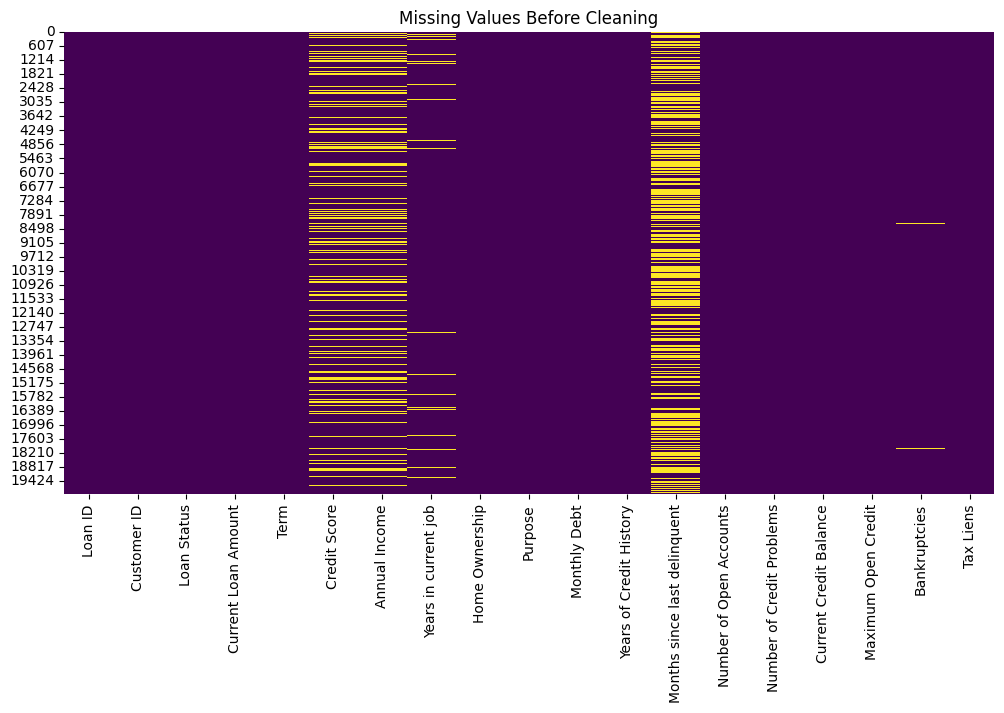


Unique values in Loan Status before filtering:
['Fully Paid' 'Charged Off']


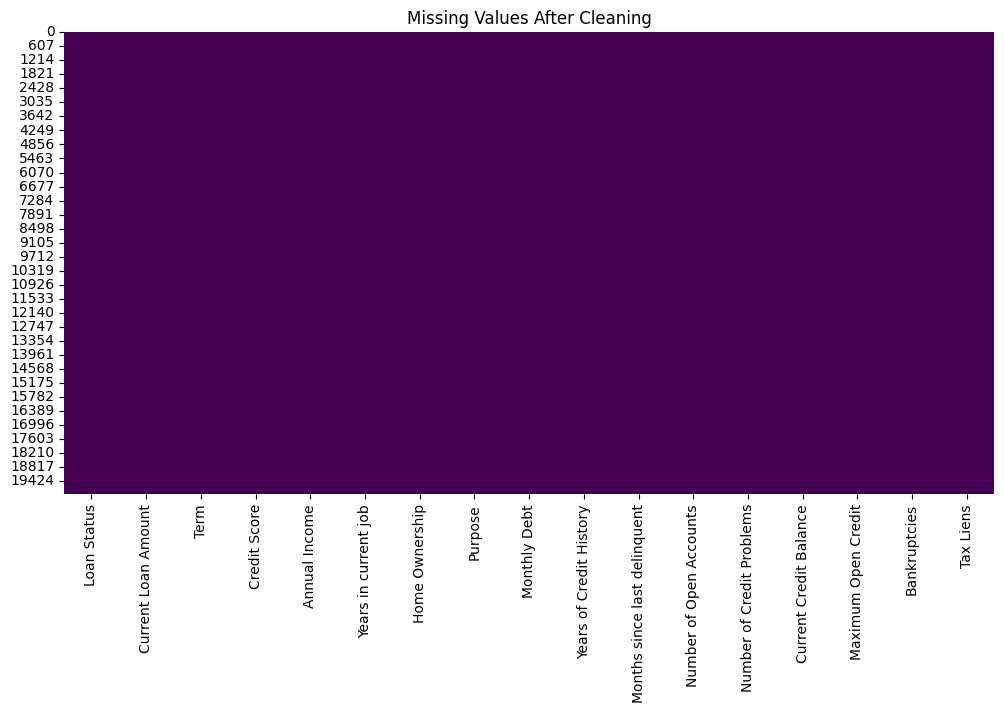


Missing Values After Cleaning:
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64


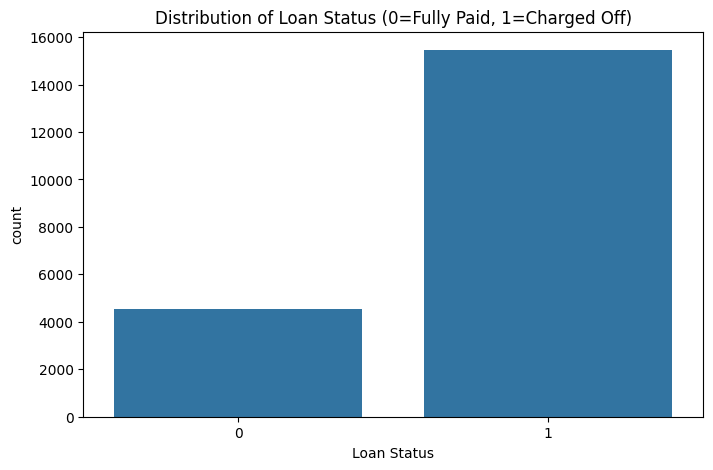


✅ Data preprocessing completed successfully!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the dataset train
df = pd.read_csv('/content/credit_trainsmallversion 20k.csv')

# Display initial info
print("Initial Data Info:")
print(df.info())
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# Visualize missing values before cleaning
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Before Cleaning')
plt.show()

# Drop unnecessary columns
df = df.drop(['Loan ID', 'Customer ID'], axis=1)

# Filter to only binary classification: Fully Paid vs Charged Off
print("\nUnique values in Loan Status before filtering:")
print(df['Loan Status'].unique())

df = df[df['Loan Status'].isin(['Fully Paid', 'Charged Off'])]

# Clean 'Years in current job' column
df['Years in current job'] = df['Years in current job'].replace('n/a', np.nan)
df['Years in current job'] = df['Years in current job'].replace('< 1 year', '0 years')

# Extract numeric value from 'Years in current job'
df['Years in current job'] = df['Years in current job'].str.extract('(\d+)')
df['Years in current job'] = pd.to_numeric(df['Years in current job'])

# Fill missing values in 'Years in current job' with median
df['Years in current job'] = df['Years in current job'].fillna(df['Years in current job'].median())

# Encode categorical columns (excluding Loan Status for now)
le = LabelEncoder()
categorical_cols = ['Term', 'Home Ownership', 'Purpose']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Encode Loan Status (binary: Fully Paid = 0, Charged Off = 1)
df['Loan Status'] = le.fit_transform(df['Loan Status'])

# Handle Credit Score errors
df['Credit Score'] = df['Credit Score'].apply(lambda x: np.nan if x > 850 else x)

# Define numerical columns
num_cols = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
            'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts',
            'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit',
            'Bankruptcies', 'Tax Liens', 'Years in current job']

# Impute missing numerical values with median
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Visualize missing values after cleaning
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values After Cleaning')
plt.show()

# Check the cleaned data
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# Visualize the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Loan Status', data=df)
plt.title('Distribution of Loan Status (0=Fully Paid, 1=Charged Off)')
plt.show()

# Prepare data for modeling
X = df.drop('Loan Status', axis=1)
y = df['Loan Status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\n✅ Data preprocessing completed successfully!")



📌 Logistic_Regression
  Accuracy : 0.7688
  Precision: 0.7691
  Recall   : 0.9994
  F1 Score : 0.8693
--------------------


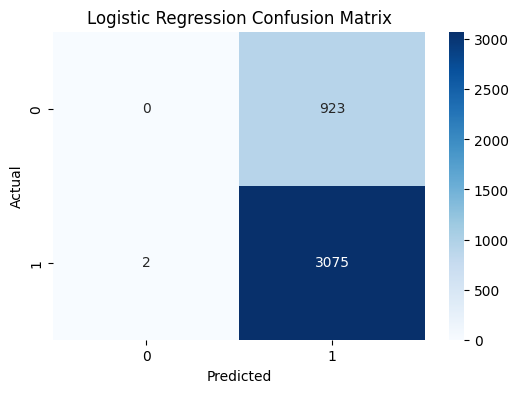

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Display results
print("\n📌 Logistic_Regression")
print(f"  Accuracy : {accuracy_lr:.4f}")
print(f"  Precision: {precision_lr:.4f}")
print(f"  Recall   : {recall_lr:.4f}")
print(f"  F1 Score : {f1_lr:.4f}")
print("--------------------")

# Confusion matrix visualization
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


📌 Decision_Tree
  Accuracy : 0.7242
  Precision: 0.8188
  Recall   : 0.8239
  F1 Score : 0.8213
--------------------


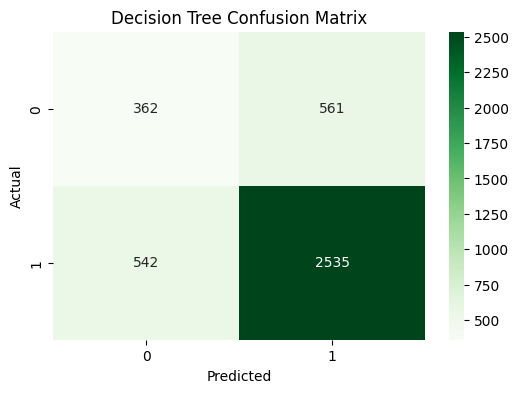

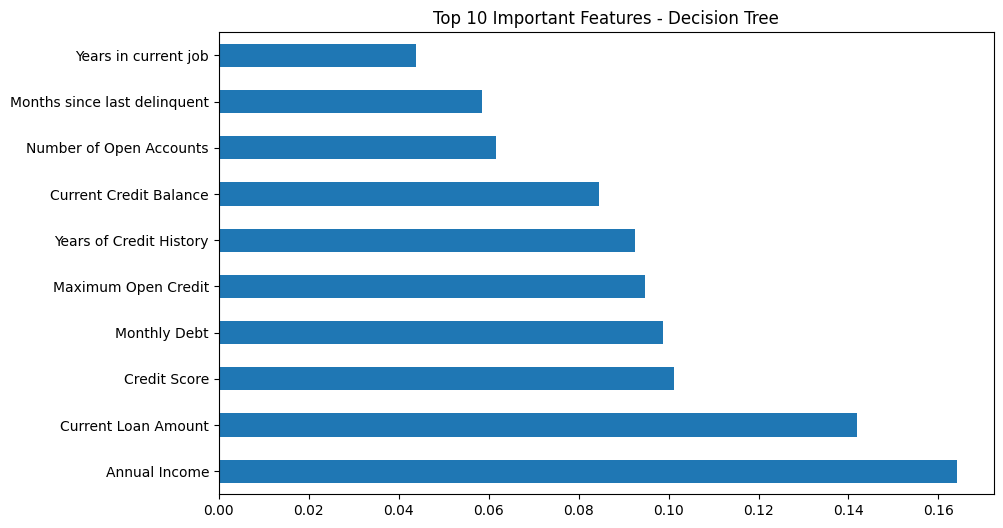

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize and train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Calculate metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Display results
print("\n📌 Decision_Tree")
print(f"  Accuracy : {accuracy_dt:.4f}")
print(f"  Precision: {precision_dt:.4f}")
print(f"  Recall   : {recall_dt:.4f}")
print(f"  F1 Score : {f1_dt:.4f}")
print("--------------------")

# Confusion matrix visualization
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance visualization
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(dt.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features - Decision Tree')
plt.show()


📌 KNN
  Accuracy : 0.7300
  Precision: 0.7829
  Recall   : 0.8980
  F1 Score : 0.8365
--------------------


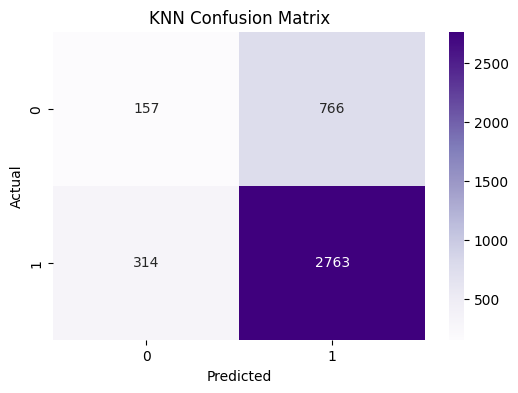

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Display results
print("\n📌 KNN")
print(f"  Accuracy : {accuracy_knn:.4f}")
print(f"  Precision: {precision_knn:.4f}")
print(f"  Recall   : {recall_knn:.4f}")
print(f"  F1 Score : {f1_knn:.4f}")
print("--------------------")

# Confusion matrix visualization
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


📌 Naive_Bayes
  Accuracy : 0.3568
  Precision: 1.0000
  Recall   : 0.1638
  F1 Score : 0.2815
--------------------


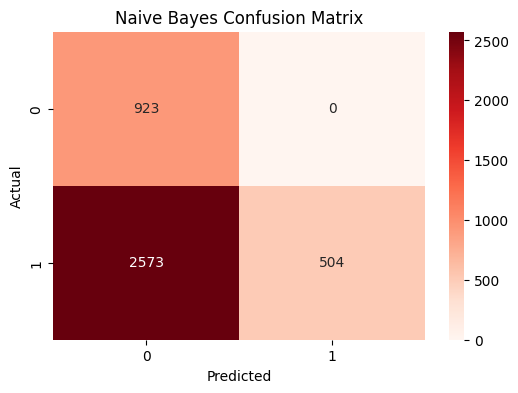

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)

# Calculate metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Display results
print("\n📌 Naive_Bayes")
print(f"  Accuracy : {accuracy_nb:.4f}")
print(f"  Precision: {precision_nb:.4f}")
print(f"  Recall   : {recall_nb:.4f}")
print(f"  F1 Score : {f1_nb:.4f}")
print("--------------------")

# Confusion matrix visualization
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Reds')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


📌 SVM
  Accuracy : 0.7690
  Precision: 0.7693
  Recall   : 0.9994
  F1 Score : 0.8694
--------------------


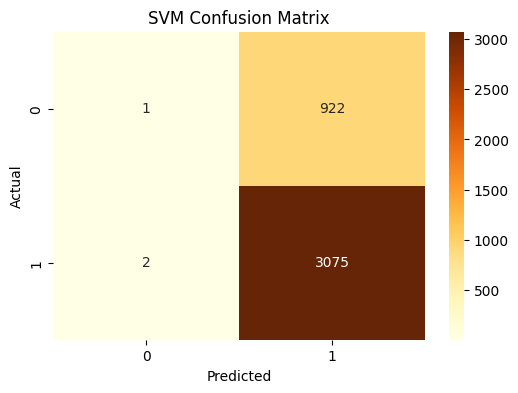

In [ ]:
from sklearn.svm import SVC

# Initialize and train the model
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Display results
print("\n📌 SVM")
print(f"  Accuracy : {accuracy_svm:.4f}")
print(f"  Precision: {precision_svm:.4f}")
print(f"  Recall   : {recall_svm:.4f}")
print(f"  F1 Score : {f1_svm:.4f}")
print("--------------------")

# Confusion matrix visualization
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='YlOrBr')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

# Example: Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Repeat for all other models:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# SVM
svm = LinearSVC(max_iter=5000)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)



Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression   0.76875   0.769135  0.999350  0.869258
1        Decision Tree   0.73000   0.823244  0.826454  0.824846
2        Random Forest   0.80325   0.809125  0.974001  0.883940
3                  KNN   0.73000   0.782941  0.897953  0.836512
4          Naive Bayes   0.35675   1.000000  0.163796  0.281486
5                  SVM   0.76925   0.769250  1.000000  0.869578


<Figure size 1200x600 with 0 Axes>

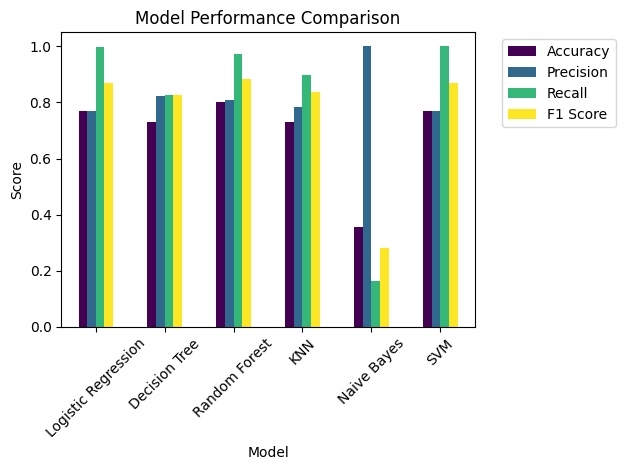

In [ ]:
# Create a comparison table
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'SVM']
accuracy = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_knn, accuracy_nb, accuracy_svm]
precision = [precision_lr, precision_dt, precision_rf, precision_knn, precision_nb, precision_svm]
recall = [recall_lr, recall_dt, recall_rf, recall_knn, recall_nb, recall_svm]
f1 = [f1_lr, f1_dt, f1_rf, f1_knn, f1_nb, f1_svm]

results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Display the results table
print("\nModel Comparison:")
print(results_df)

# Visualize model comparison
plt.figure(figsize=(12, 6))
results_df.set_index('Model').plot(kind='bar', colormap='viridis')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-25-ebb9f4012454>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1 Score', data=results_df, palette='viridis')


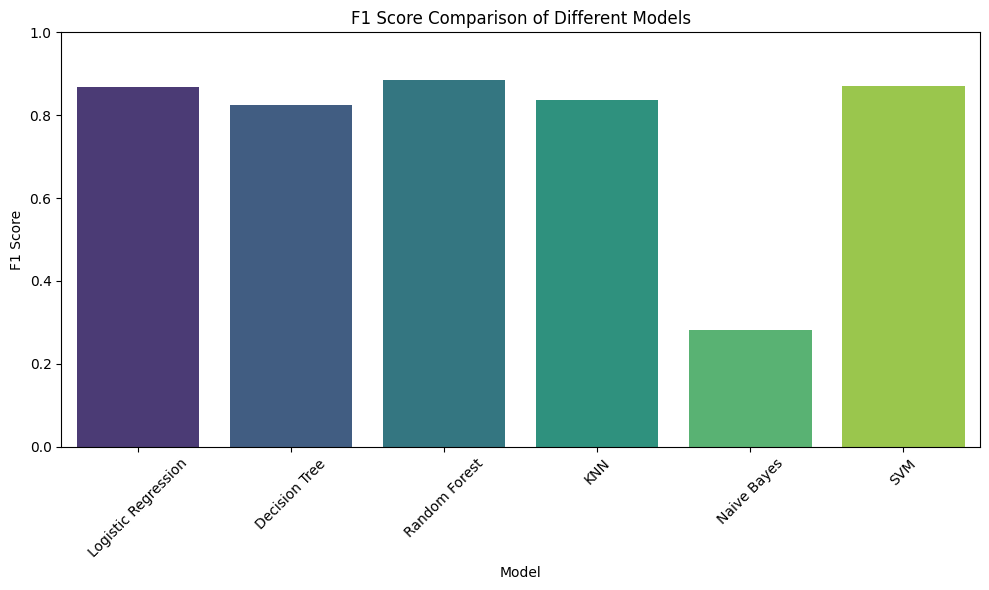

<ipython-input-25-ebb9f4012454>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='magma')


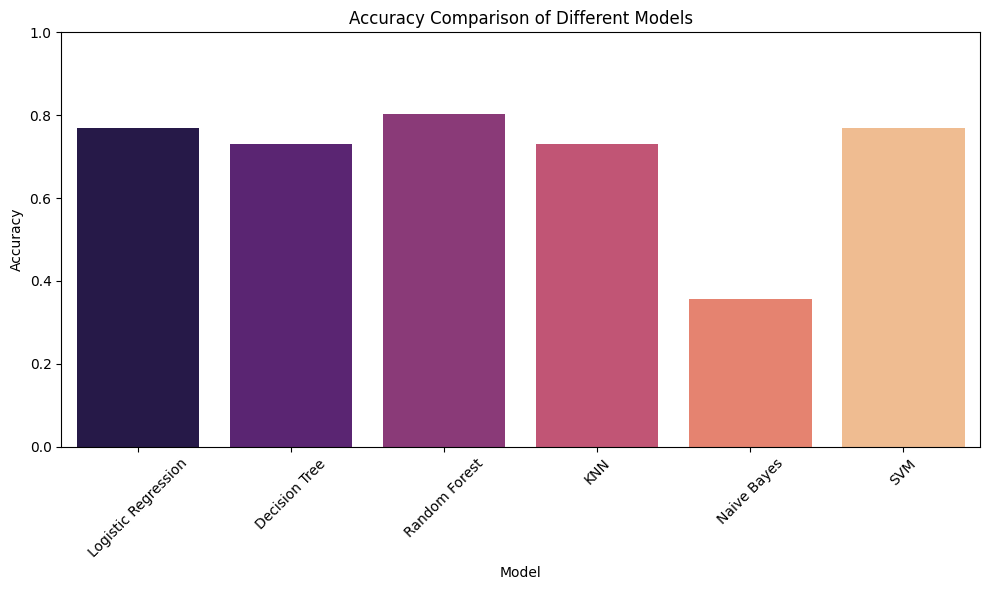

<ipython-input-25-ebb9f4012454>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=results_df, palette='coolwarm')


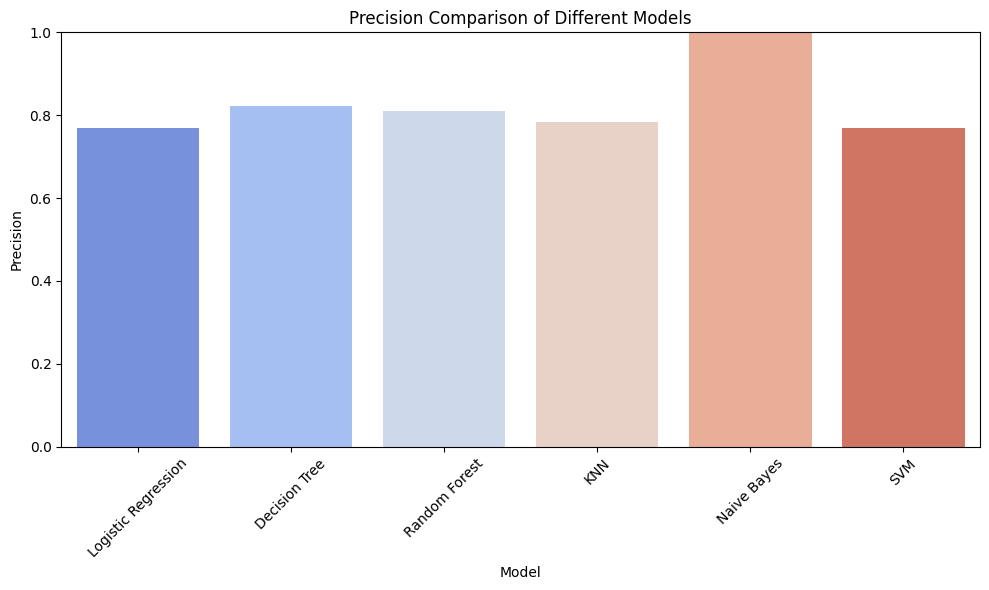

<ipython-input-25-ebb9f4012454>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=results_df, palette='cubehelix')


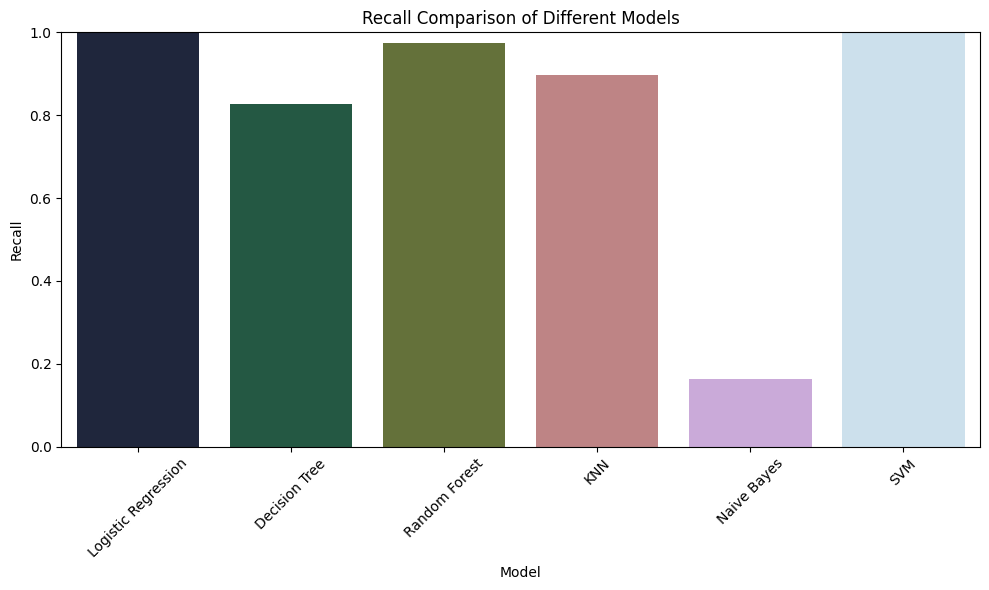

In [ ]:
import matplotlib.pyplot as plt

# Plot F1 Score comparison across models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=results_df, palette='viridis')
plt.title('F1 Score Comparison of Different Models')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Accuracy comparison across models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='magma')
plt.title('Accuracy Comparison of Different Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Precision comparison across models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=results_df, palette='coolwarm')
plt.title('Precision Comparison of Different Models')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Recall comparison across models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=results_df, palette='cubehelix')
plt.title('Recall Comparison of Different Models')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


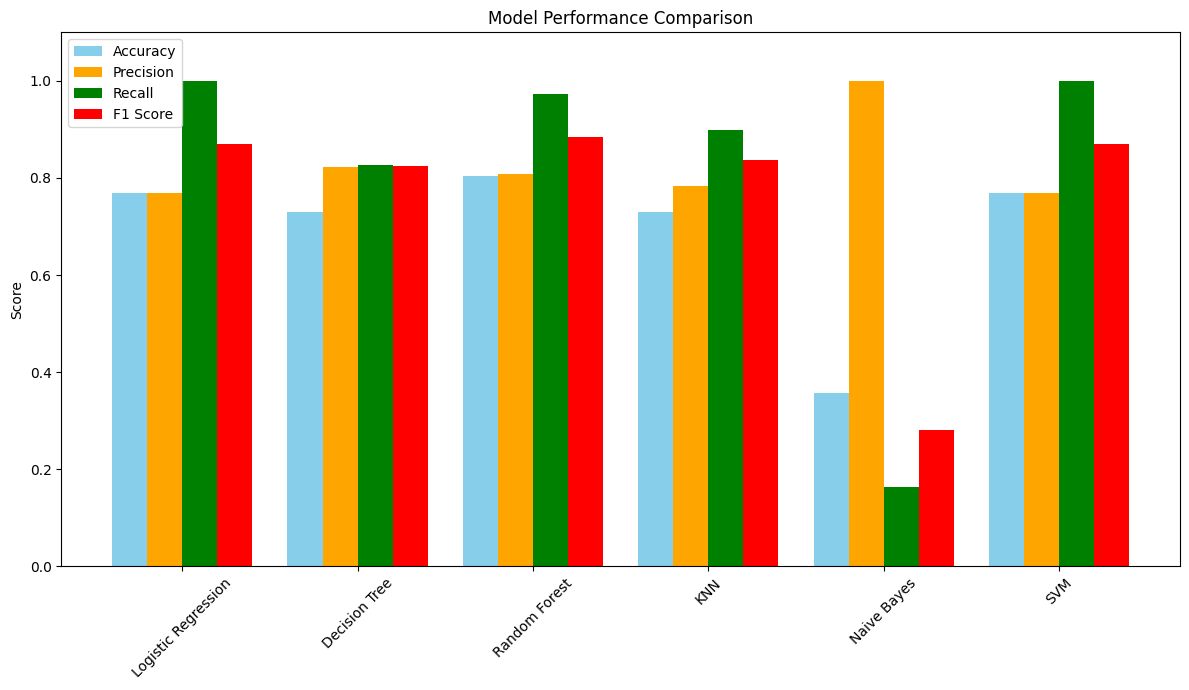

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Prepare data for grouped bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(results_df['Model']))  # the label locations
width = 0.2  # width of the bars

plt.figure(figsize=(12, 7))

# Plot bars for each metric, shifting their positions
plt.bar(x - 1.5*width, results_df['Accuracy'], width, label='Accuracy', color='skyblue')
plt.bar(x - 0.5*width, results_df['Precision'], width, label='Precision', color='orange')
plt.bar(x + 0.5*width, results_df['Recall'], width, label='Recall', color='green')
plt.bar(x + 1.5*width, results_df['F1 Score'], width, label='F1 Score', color='red')

# Labels and titles
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.title('Model Performance Comparison')
plt.xticks(x, results_df['Model'], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
